In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as scp
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
# 1. Read the dataset and understand the features and target variable (4 Points) 

In [30]:
qb = pd.read_csv("G:\R5 - Unsupervised Learning QB Project\Qualitative_Bankruptcy.txt")

In [ ]:
# Exploratory Data Analysis

In [31]:
qb.head(10)

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
5,P,P,A,P,P,P,NB
6,P,P,P,A,A,P,NB
7,P,P,A,P,A,P,NB
8,P,P,A,A,P,P,NB
9,P,P,P,P,A,P,NB


In [32]:
qb.shape ## To display no : of rows and columns

(249, 7)

In [ ]:
Dataset has 249 rows and 7 columns

In [33]:
for col in qb:
    print (col)
    print (qb[col].unique())

P
['N' 'A' 'P']
P.1
['N' 'A' 'P']
A
['A' 'P' 'N']
A.1
['A' 'P' 'N']
A.2
['A' 'P' 'N']
P.2
['N' 'A' 'P']
NB
['NB' 'B']


In [ ]:
# To display summary of dataframe

In [34]:
qb.describe()

,P,P.1,A,A.1,A.2,P.2,NB
count,249,249,249,249,249,249,249
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,142


In [ ]:
# 2. Encode independent features. (4 points)

In [ ]:
# Label Encoding - to convert text form to numerical form for better modelling purpose
# Assigning all columns to a variable.

In [37]:
var = ['P','P.1','A','A.1','A.2', 'P.2', 'NB']
var

['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2', 'NB']

In [39]:
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,qb)

In [40]:
qb.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,1,1,0,0,0,1,1
1,0,0,0,0,0,0,1
2,2,2,2,2,2,2,1
3,1,1,2,2,2,1,1
4,0,0,2,2,2,0,1


In [ ]:
Through Label Encoder we have transformed all the cloumns into Numerical value so as it will best suit for our modelling purpose.

In [ ]:
# EDA on transformed data

In [41]:
qb.describe()

,P,P.1,A,A.1,A.2,P.2,NB
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.991968,0.967871,0.935743,1.012048,1.144578,1.084337,0.570281
std,0.803179,0.723296,0.721143,0.790477,0.753474,0.732948,0.496033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
# To check if any null values are exist or not in any of the columns.

In [42]:
qb.isnull().any()

P      False
P.1    False
A      False
A.1    False
A.2    False
P.2    False
NB     False
dtype: bool

In [ ]:
# Plotting pairplot for the Qualitative Bankruptcy dataset

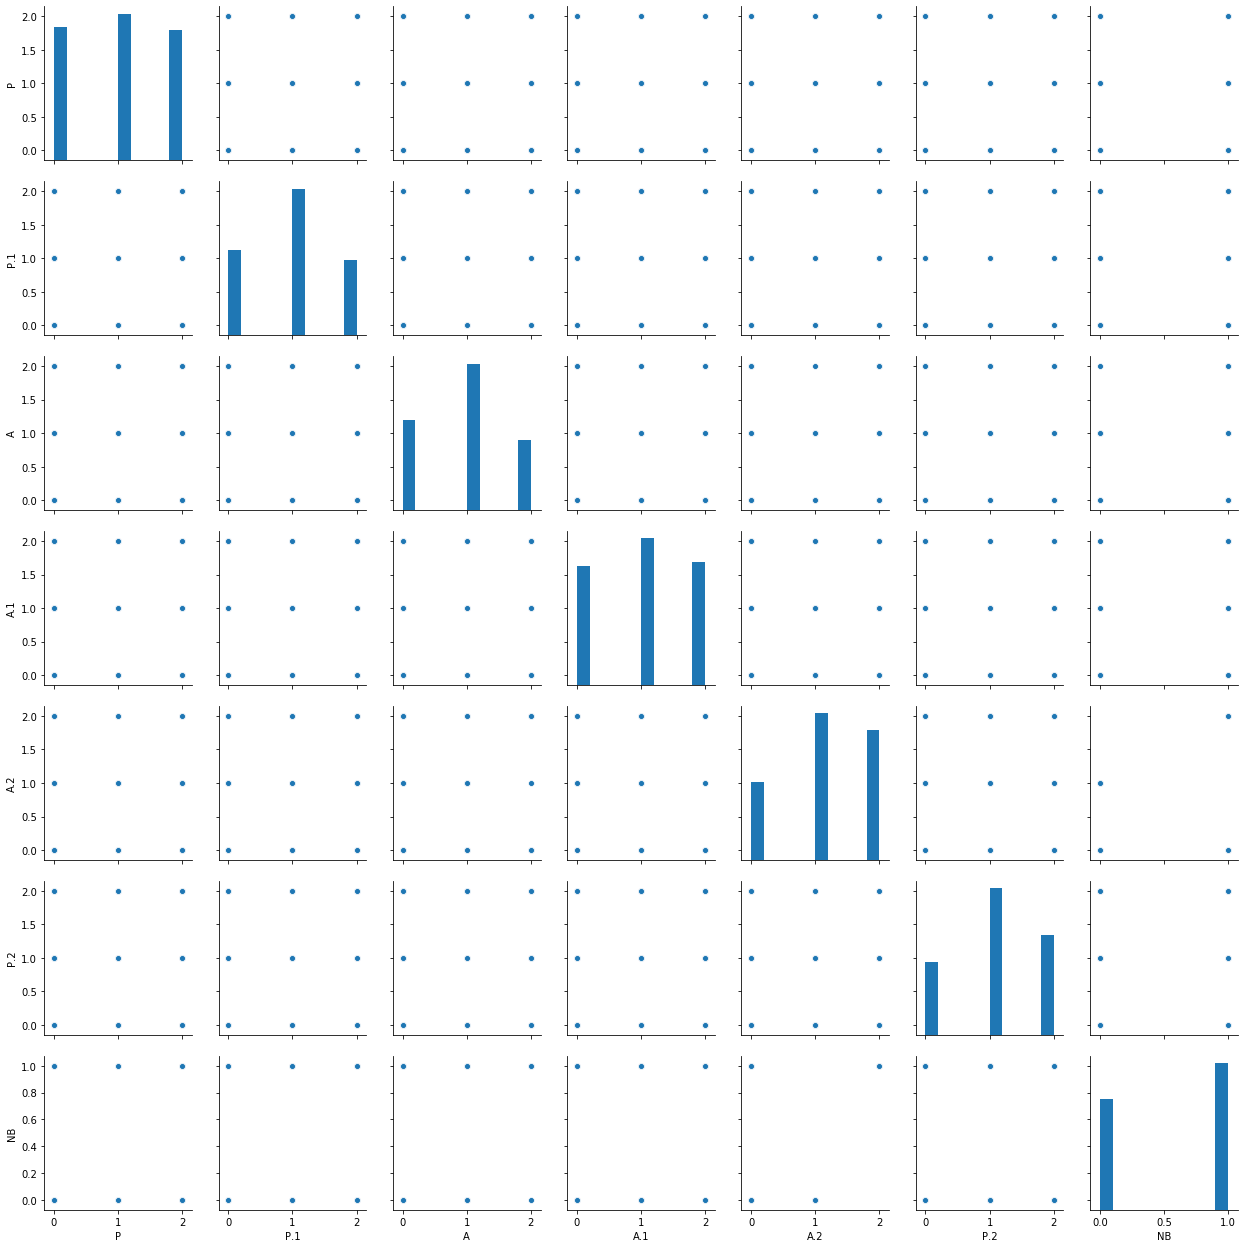

In [46]:
sns.pairplot(qb)

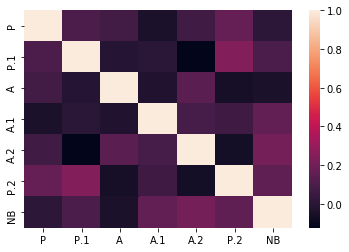

In [44]:
sns.heatmap(qb.corr())

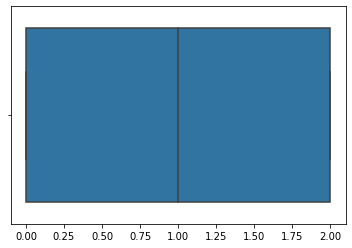

In [101]:
sns.boxplot(qb)

In [ ]:
# Calculating correlation for each column

In [47]:
qb.corr()

,P,P.1,A,A.1,A.2,P.2,NB
P,1.000000,0.103668,0.075684,-0.044304,0.068556,0.172394,0.011544
P.1,0.103668,1.000000,-0.011704,0.000680,-0.124622,0.248525,0.096230
A,0.075684,-0.011704,1.000000,-0.026931,0.143322,-0.058365,-0.043686
A.1,-0.044304,0.000680,-0.026931,1.000000,0.085074,0.060876,0.157229
A.2,0.068556,-0.124622,0.143322,0.085074,1.000000,-0.065977,0.210055
P.2,0.172394,0.248525,-0.058365,0.060876,-0.065977,1.000000,0.155539
NB,0.011544,0.096230,-0.043686,0.157229,0.210055,0.155539,1.000000


In [ ]:
In the above we can see the correlation between different variables are between -0.5 to 0.5, so we can take all the variables for developing prediction model.

In [ ]:
# 3. Separate the dependant variable from the rest of the train data. (2 Points)

In [ ]:
# Storing the dependent variables to xVal and independent variable to yVal

In [50]:
xVal = qb.drop(['NB'], axis=1)

In [51]:
xVal.head()

,P,P.1,A,A.1,A.2,P.2
0,1,1,0,0,0,1
1,0,0,0,0,0,0
2,2,2,2,2,2,2
3,1,1,2,2,2,1
4,0,0,2,2,2,0


In [53]:
yVal = qb.NB.values.reshape(-1,1)

In [54]:
yVal.shape

(249, 1)

In [ ]:
# 4. Split the dataset into training and test data (Considering 80:20 ratio). (2 points)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=42)

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", Y_test.shape)

X_train shape: (199, 6)
X_test shape: (50, 6)
Y_train shape: (199, 1)
X_test shape: (50, 1)


In [ ]:
# 5. Apply PCA on the independent features of train data. (2 points)

In [60]:
# Step 1 - Create covariance matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=qb.drop('NB',axis=1)
y=qb['NB']

X_train_std = sc.fit_transform(X_train) # scale training to prevent data leaks

In [62]:
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00505051  0.08256158  0.03818374 -0.02269409  0.06946171  0.16723627]
 [ 0.08256158  1.00505051 -0.04870114  0.08214868 -0.10493071  0.22645491]
 [ 0.03818374 -0.04870114  1.00505051  0.00311739  0.17923334 -0.05758179]
 [-0.02269409  0.08214868  0.00311739  1.00505051  0.03766526  0.05953403]
 [ 0.06946171 -0.10493071  0.17923334  0.03766526  1.00505051 -0.06569375]
 [ 0.16723627  0.22645491 -0.05758179  0.05953403 -0.06569375  1.00505051]]


In [ ]:
# Identifying Eigen Values and Eigen Vector

In [ ]:
# Step 2 of PCA - Get eigen values and eigen vector

In [63]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n%s', eig_vals)
print('Eigen Vectors \n%s', eig_vecs)


 Eigen Values 
%s [1.38649269 1.20367424 1.02970026 0.87501586 0.75506723 0.78035275]
Eigen Vectors 
%s [[ 0.28931581  0.51359501  0.45036328  0.39083137 -0.32895463  0.43442967]
 [ 0.58140954  0.08253208 -0.14124216 -0.4561165  -0.55368567 -0.34726355]
 [-0.28920933  0.55175121 -0.0611228  -0.68766512  0.14997008  0.33588424]
 [ 0.16647846  0.16213622 -0.8701449   0.29046949 -0.02063834  0.32256185]
 [-0.32977889  0.59209887 -0.10350707  0.2862714  -0.04877835 -0.6675481 ]
 [ 0.59845474  0.21933992  0.07497806 -0.00119144  0.74828119 -0.16791086]]


In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.99208981  42.95251689  60.02794832  74.53826164  87.47878462
 100.        ]


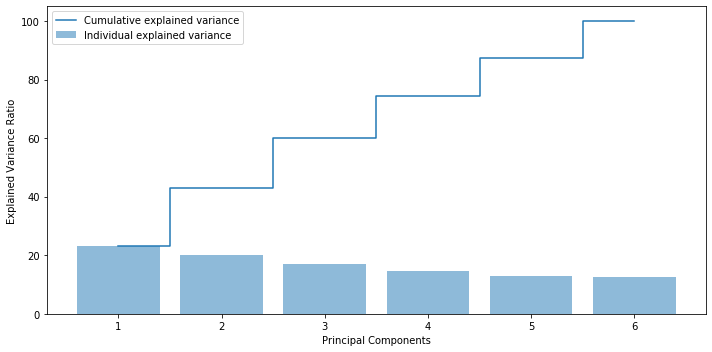

In [67]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Transform the data using PCA ( select optimum number of PCs). (4 points)

In [85]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [86]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_

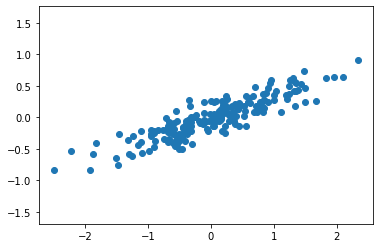

In [90]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [92]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [95]:
# Predicting the test set result using  
# predict function under LogisticRegression  
y_pred = classifier.predict(X_test)

In [ ]:
# 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). (6 points)

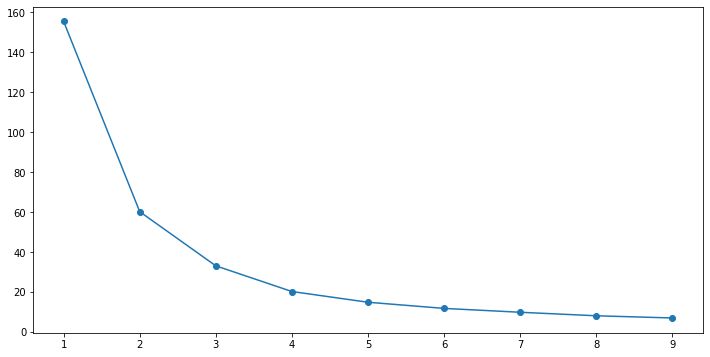

In [97]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# 8. Apply KMeans algorithm on the above transformed data. (6 points)

In [99]:
from sklearn import metrics
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-


cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,155.420870
1,2,60.176394
2,3,33.062723
3,4,20.207409
4,5,14.830640
5,6,11.757386
6,7,9.819421
7,8,8.011507
8,9,7.181192


In [ ]:
#  9. Select optimal number of clusters and form clusters out of the train data. (10 points)

In [100]:
# Number of clusters
kmeans = KMeans(n_clusters=2)

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids

print("Centroid values")

print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[-0.6727353  -0.24953654]
 [ 0.63512948  0.20501128]]


In [105]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [109]:
from sklearn.cluster import KMeans
from scipy.stats import zscore

df_scaled = qb.apply(zscore)

In [110]:
df_scaled.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,0.010021,0.044509,-1.300196,-1.282879,-1.522128,-0.115298,0.868056
1,-1.237540,-1.340835,-1.300196,-1.282879,-1.522128,-1.482398,0.868056
2,1.257581,1.429853,1.478763,1.252334,1.137591,1.251803,0.868056
3,0.010021,0.044509,1.478763,1.252334,1.137591,-0.115298,0.868056
4,-1.237540,-1.340835,1.478763,1.252334,1.137591,-1.482398,0.868056


In [111]:
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [112]:
centroids=kmeans.cluster_centers_

In [113]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [114]:
centroid_df

,P,P.1,A,A.1,A.2,P.2,NB
0,0.105987,-0.062056,0.119822,0.193674,1.137591,0.004887,0.868056
1,-0.069611,0.486640,-0.472421,0.038668,-1.522128,0.524622,0.868056
2,-0.057415,-0.155180,0.101802,-0.175151,-0.288115,-0.226144,-1.079205


In [ ]:
# 10. Create a new column in the train data and populate it with the cluster labels. (4 points)

In [115]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [117]:
# Joining the label dataframe with the Qualitative Bankruptcy data frame to create qb_labeled. 
# Note: it could be appended to original dataframe
qb_labeled = df_scaled.join(df_labels)

In [118]:
qb_clusters = qb_labeled.groupby(['labels'])
#qb_clusters = qb_attr.groupby(['clusters'])
df0=qb_clusters.get_group(0)
df1=qb_clusters.get_group(1)
df2=qb_clusters.get_group(2)

In [119]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [120]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):  
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)
  

In [121]:
tot_I=I0+I1+I2
print(tot_I)

1219.643250503259


In [122]:
kmeans.inertia_

1219.6432505032592

In [ ]:
# 11. Transform the test data using the same PCA object that was fit on the train data. (4 points)

In [124]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
Y_train = sc.fit_transform(Y_train) 
Y_test = sc.transform(Y_test)

In [126]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 1) 
  
Y_train = pca.fit_transform(Y_train) 
Y_test = pca.transform(Y_test) 
  
explained_variance = pca.explained_variance_ratio_

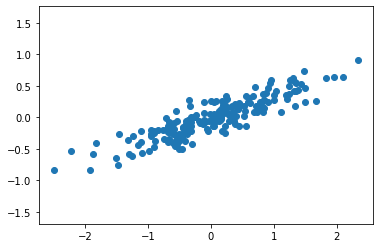

In [127]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [131]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [ ]:
# 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. (4 points)

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.2146120873671361


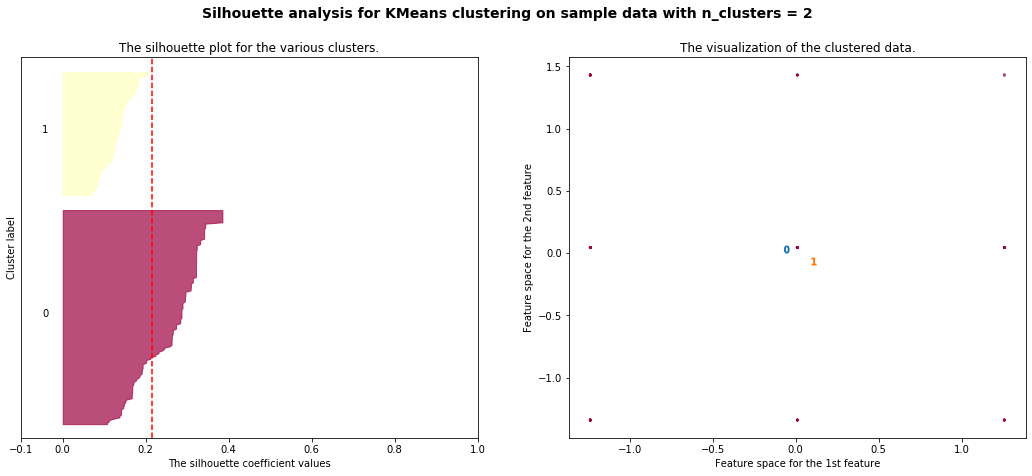

For n_clusters = 3 The average silhouette_score is : 0.2472241735023401


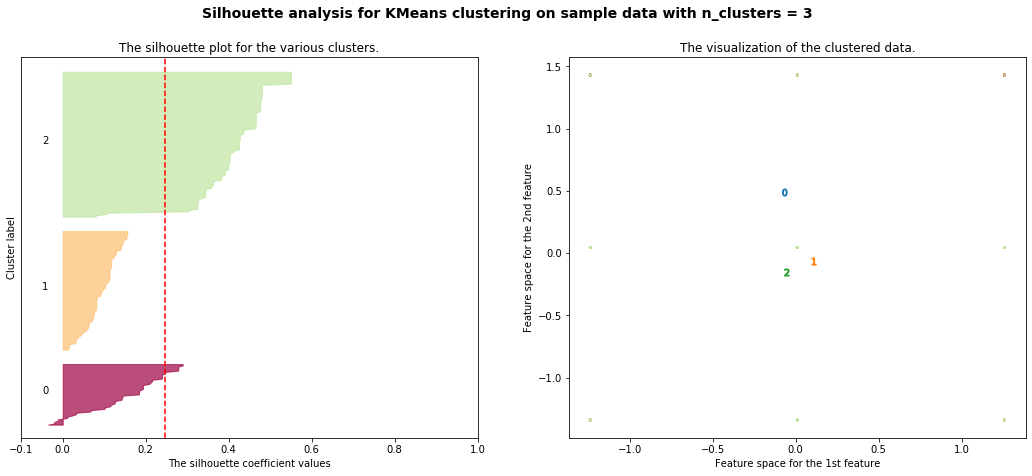

For n_clusters = 4 The average silhouette_score is : 0.2806452439367245


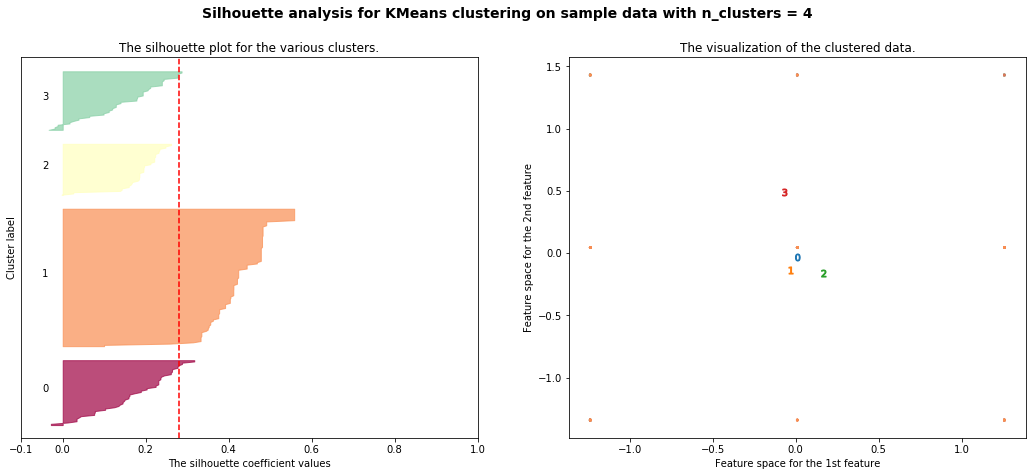

For n_clusters = 5 The average silhouette_score is : 0.29499129878397906


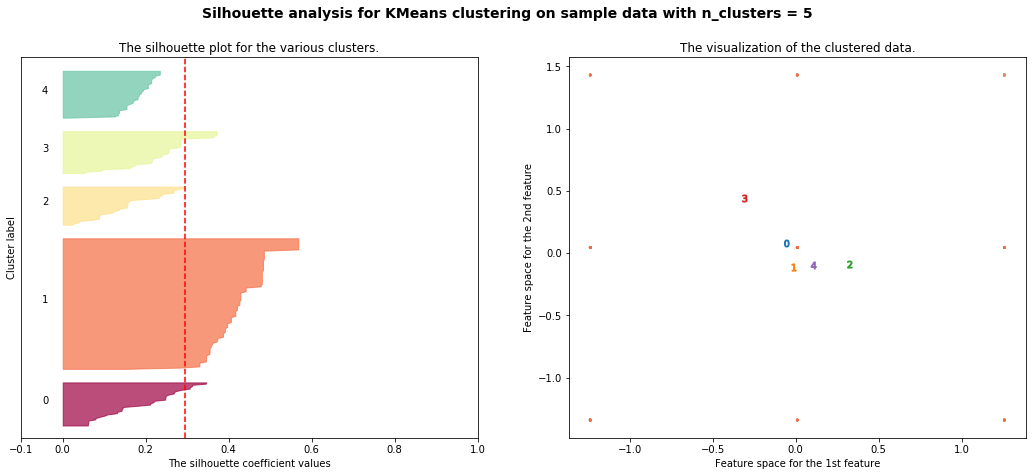

For n_clusters = 6 The average silhouette_score is : 0.20650508220609184


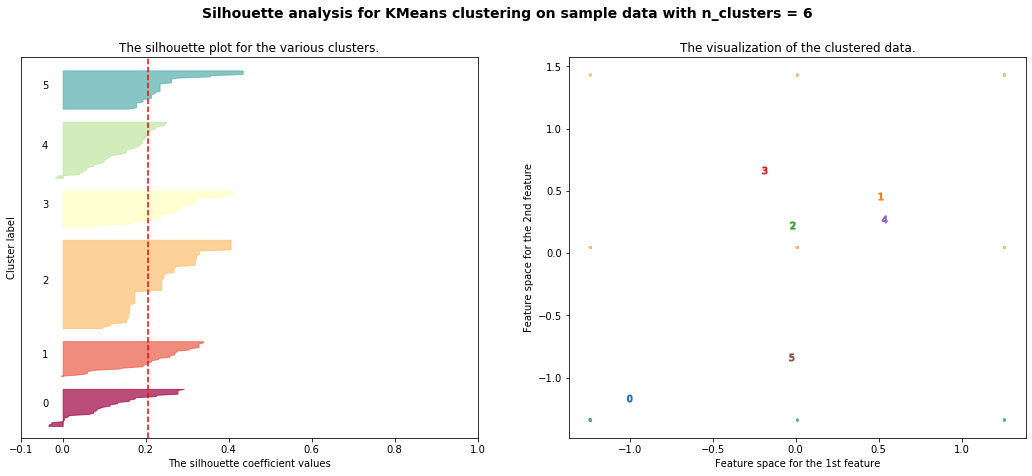

In [132]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
# 13. Apply SVC model on train dataset and predict target for test dataset. (6 points)

In [135]:
qb = pd.read_csv("G:\R5 - Unsupervised Learning QB Project\Qualitative_Bankruptcy.txt")

In [136]:
qb.head(15)

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB
5,P,P,A,P,P,P,NB
6,P,P,P,A,A,P,NB
7,P,P,A,P,A,P,NB
8,P,P,A,A,P,P,NB
9,P,P,P,P,A,P,NB


In [158]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [165]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x]== predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [166]:
clf = svm.SVC(gamma=0.025, C=3)    
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface

In [168]:
X,y = np.array(qb)[ :, 1:16], np.array(qb)[:]   # note for y, extracting all rows of "letter" col

In [169]:
X_train = X[:16000, :]
X_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

In [177]:
svm_clf = svm.SVC(kernel='linear') 

svm_clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'B'

In [171]:
y_pred = clf.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [172]:
type(y_pred)

numpy.ndarray

In [173]:
type(y_train)

numpy.ndarray

In [175]:
y_pred
y_pred = ", " 

In [176]:
getAccuracy(y_test , y_pred)

ZeroDivisionError: float division by zero

In [178]:
y_pred = svm_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# 14. Check accuracy and confusion matrix. (2 points)

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [181]:
print("Building Classifier using PCA features")
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(pca.transform(X_train), y_train)

Building Classifier using PCA features


ValueError: could not convert string to float: 'N'

In [182]:
model.score(pca.transform(X_test), y_test)

ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required.